In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [2]:
data_path = os.path.join(os.getcwd(), 'Data/PartB', "BristolAir_Exploratory.csv")
train_set = pd.read_csv(data_path, compression = "bz2")

In [3]:
train_set[5000:100000]

,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
5000,2010-11-17 15:00:00+00:00,83.25000,33.25000,32.50000,6,51.427864,-2.563742
5001,2006-04-08 12:00:00+00:00,52.25000,32.00000,20.50000,2,51.442537,-2.571375
5002,2003-06-04 03:00:00+00:00,47.75000,36.75000,7.00000,6,51.427864,-2.563742
5003,2010-11-18 00:00:00+00:00,37.50000,28.00000,9.25000,2,51.442537,-2.571375
5004,2007-09-25 01:00:00+00:00,55.50000,28.75000,17.25000,10,51.460674,-2.582253
5005,2003-06-04 04:00:00+00:00,76.25000,49.50000,17.50000,14,51.455433,-2.596262
5006,2005-07-26 14:00:00+00:00,287.50000,95.50000,125.25000,14,51.455433,-2.596262
5007,2007-09-25 11:00:00+00:00,100.75000,42.75000,37.75000,16,51.432676,-2.604957
5008,2003-06-04 04:00:00+00:00,45.67000,32.67000,8.67000,16,51.432676,-2.604957
5009,2005-07-27 07:00:00+00:00,214.25000,72.50000,92.00000,16,51.432676,-2.604957


In [4]:
train_set.isnull().sum()

Date Time         0
NOx          115538
NO2          118332
NO           109222
SiteID            0
Loc.Lat           0
Loc.Long          0
dtype: int64

In [5]:
print(train_set["NOx"])

0           87.000000
1           98.500000
2          202.000000
3          107.800000
4          115.780000
              ...    
1306753     36.720001
1306754     23.524000
1306755     62.839438
1306756    422.792179
1306757     99.641000
Name: NOx, Length: 1306758, dtype: float64


In [6]:
train_set["NO"].lt(0).sum()

542

In [7]:
train_set["NO2"].lt(0).sum()

98

In [8]:
train_set.describe()

,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
count,1.191220e+06,1.188426e+06,1.197536e+06,1.306758e+06,1.306758e+06,1.306758e+06
mean,1.200819e+02,4.493445e+01,4.956930e+01,8.411554e+00,5.145213e+01,-2.580516e+00
std,1.428863e+02,3.183197e+01,7.645375e+01,5.329009e+00,1.607845e-02,2.738316e-02
min,-3.108000e+01,-6.669844e+00,-1.771000e+01,0.000000e+00,5.142786e+01,-2.688779e+00
25%,3.550000e+01,2.200000e+01,7.000000e+00,4.000000e+00,5.144175e+01,-2.592724e+00
50%,7.300000e+01,3.800000e+01,2.200000e+01,7.000000e+00,5.145543e+01,-2.582253e+00
75%,1.450000e+02,5.950000e+01,5.700000e+01,1.400000e+01,5.146067e+01,-2.562714e+00
max,2.164250e+03,5.765000e+02,1.231250e+03,1.700000e+01,5.148999e+01,-2.535230e+00


In [9]:
np.geomspace(10e-4, 10e5, 19)

array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05, 3.16227766e+05, 1.00000000e+06])

# 5.1

We see that the dataset consist of a very big number of instances, but a small number of attributes. This is good, since we have a large dataset, so we will get more reliable results. The dimensionality of the dataset is low, however, some attributes can be removed and the information will not be lost, since they are not independent. Clearly, these attributes are Loc.Lat and Loc.Long, which can be removed, since the information the give can be extracted from the SiteID (18 different places). In addition, the three columns NOx, NO2 and NO, can have some dependence to each other, so one or two of them can be removed, without losing much information. In the dataset, we can also observe a large number of null and negative values, fact that it is unreasonable since the observation values should be above 0.

In [10]:
train_set.groupby('SiteID').SiteID.count()
aaa = train_set.groupby('SiteID')
print(aaa)
sum =0
null_values = []
total_instances = []
negative_values = []
for i in range(0,18):
    a = aaa.get_group((i))
    c = a["SiteID"].count()
    total_instances.append(c)
    aa = a.isnull().any(axis=1).sum()
    null_values.append(aa)
    sum += aa
    print(aa)
    
    
    #print(type(a))
    count_negatives = 0
    for j in range(c):
        if a["NO"].iloc[j] < 0 or a["NOx"].iloc[j] < 0 or a["NO2"].iloc[j] < 0:
            count_negatives += 1
    
    negative_values.append(count_negatives)
    

    
print(sum)
print(null_values)
print(total_instances)
print(negative_values)

104
10260
2739
19692
1547
10060
10581
4831
9228
1170
3461
394
7910
6393
12001
2712
10079
5710
118872
[104, 10260, 2739, 19692, 1547, 10060, 10581, 4831, 9228, 1170, 3461, 394, 7910, 6393, 12001, 2712, 10079, 5710]
[6446, 163111, 62990, 25464, 74787, 113952, 142141, 115162, 43824, 22071, 96407, 20693, 45240, 12423, 113951, 2712, 154331, 91053]
[0, 0, 3, 198, 4, 0, 4, 320, 0, 0, 4, 18, 0, 2, 0, 0, 21, 2]


In [11]:
print(null_values)
print(total_instances)
print(negative_values)

ss= 0
for i in range(len(total_instances)):
    ss += total_instances[i]
print(ss)

[104, 10260, 2739, 19692, 1547, 10060, 10581, 4831, 9228, 1170, 3461, 394, 7910, 6393, 12001, 2712, 10079, 5710]
[6446, 163111, 62990, 25464, 74787, 113952, 142141, 115162, 43824, 22071, 96407, 20693, 45240, 12423, 113951, 2712, 154331, 91053]
[0, 0, 3, 198, 4, 0, 4, 320, 0, 0, 4, 18, 0, 2, 0, 0, 21, 2]
1306758


In [12]:
array_latex = [total_instances]

In [13]:
add = []
null_p = []
negative_p = []
problematic = []
for i in range(18):
    add.append(null_values[i] + negative_values[i])
    null_p.append(round(null_values[i]/total_instances[i]*100,1))
    negative_p.append(round(negative_values[i]/total_instances[i]*100,3))


for i in range(18):
    problematic.append(round(add[i]/total_instances[i] * 100,1))
    
negative_p

[0.0,
 0.0,
 0.005,
 0.778,
 0.005,
 0.0,
 0.003,
 0.278,
 0.0,
 0.0,
 0.004,
 0.087,
 0.0,
 0.016,
 0.0,
 0.0,
 0.014,
 0.002]

In [14]:
array_latex.append(null_p)
array_latex.append(negative_p)
array_latex.append(problematic)


df = pd.DataFrame((np.transpose(array_latex)))

df.columns = ['Number of Samples', 'Null values (%)', 'Negative values (%)','Problematic (%)']
df['Number of Samples'] = df['Number of Samples'].astype(int)

In [15]:
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Number of Samples &  Null values (\%) &  Negative values (\%) &  Problematic (\%) \\
\midrule
0  &               6446 &              1.6 &                0.000 &              1.6 \\
1  &             163111 &              6.3 &                0.000 &              6.3 \\
2  &              62990 &              4.3 &                0.005 &              4.4 \\
3  &              25464 &             77.3 &                0.778 &             78.1 \\
4  &              74787 &              2.1 &                0.005 &              2.1 \\
5  &             113952 &              8.8 &                0.000 &              8.8 \\
6  &             142141 &              7.4 &                0.003 &              7.4 \\
7  &             115162 &              4.2 &                0.278 &              4.5 \\
8  &              43824 &             21.1 &                0.000 &             21.1 \\
9  &              22071 &              5.3 &                0.000 &         

In [16]:
df

,Number of Samples,Null values (%),Negative values (%),Problematic (%)
0,6446,1.6,0.000,1.6
1,163111,6.3,0.000,6.3
2,62990,4.3,0.005,4.4
3,25464,77.3,0.778,78.1
4,74787,2.1,0.005,2.1
5,113952,8.8,0.000,8.8
6,142141,7.4,0.003,7.4
7,115162,4.2,0.278,4.5
8,43824,21.1,0.000,21.1
9,22071,5.3,0.000,5.3


# 5.3

The number of samples in each site varies from a very small number (site 15) and a very large one (site 1). We are sure that something's not going good with site 15 (all problematic). Sites with also too many problematic samples are the site 3 with a proportion over 3/4, and site 13 with over the half of its samples been problematic. Although the percentages of these problematic sites are extremely high, we see that the number of samples is small for each of these sites. This is good, since they are a very small portion of the data.

In [17]:
tt = train_set
tt

,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
0,2007-03-27 13:00:00+00:00,87.000000,28.000000,28.750000,1,51.441747,-2.559956
1,2007-03-27 14:00:00+00:00,98.500000,32.000000,32.500000,1,51.441747,-2.559956
2,2007-03-27 20:00:00+00:00,202.000000,97.750000,68.000000,6,51.427864,-2.563742
3,2007-03-28 02:00:00+00:00,107.800000,39.520000,44.520000,8,51.489993,-2.688779
4,2007-03-28 04:00:00+00:00,115.780000,31.940000,54.670000,8,51.489993,-2.688779
5,2007-03-28 07:00:00+00:00,410.500000,49.500000,218.250000,1,51.441747,-2.559956
6,2007-03-28 08:00:00+00:00,295.480000,53.350000,157.870000,8,51.489993,-2.688779
7,2007-03-28 12:00:00+00:00,129.750000,39.500000,45.500000,1,51.441747,-2.559956
8,2007-03-28 13:00:00+00:00,162.860000,69.530000,60.850000,8,51.489993,-2.688779
9,2007-03-28 13:00:00+00:00,217.750000,86.000000,86.250000,10,51.460674,-2.582253


In [18]:
tt = tt.drop(aaa.get_group(15).index)
tt.shape

(1304046, 7)

In [19]:
tt = tt.drop(aaa.get_group(3).index)
tt.shape

(1278582, 7)

In [20]:
tt_correlation = tt[["NOx", "NO", "NO2"]]

In [24]:
tt_corr = round(tt_correlation.corr(),3)
tt_corr

,NOx,NO,NO2
NOx,1.000,0.988,0.878
NO,0.988,1.000,0.808
NO2,0.878,0.808,1.000


# 5.5

We observe a very strong correlation between NOx and NO which is near 1 (nearly linear relationship). That means that there is a dependence between these two columns, and thus one of them can be eliminated without losing information. NO2 is also correlated with the other 2 but with a weaker but also strong correlation (better with NOx). 

In [25]:
data_path = os.path.join(os.getcwd(), 'Data/PartB', "BristolAir_SiteAligned.csv")
train_set_aligned = pd.read_csv(data_path, compression = "bz2", header = [0,1], parse_dates = [0])

In [26]:
train_set_aligned

Date Time    NOx                                        \
             Unnamed: 0_level_1      1       2       4       6     7      10   
0     2009-03-14 04:00:00+00:00  10.50   15.25   21.50   23.75   8.0   53.25   
1     2009-03-14 05:00:00+00:00   9.75    9.50   11.50   23.25  10.0   30.50   
2     2009-03-15 17:00:00+00:00  67.25   88.75   66.00  163.75  36.0  203.75   
3     2009-03-17 13:00:00+00:00  71.75  124.50  135.00   96.50  38.0  172.50   
4     2009-03-17 15:00:00+00:00  82.00  125.00  104.25  106.50  36.0  193.00   
...                         ...    ...     ...     ...     ...   ...     ...   
14890 2012-03-25 10:00:00+00:00  53.00   67.25  143.50  123.25  29.0   86.75   
14891 2012-03-25 11:00:00+00:00  29.50   42.50   81.00   75.75  36.0   87.25   
14892 2012-03-25 12:00:00+00:00  25.75   44.75   88.25   46.25  27.0  102.00   
14893 2012-03-25 13:00:00+00:00  40.75   46.75   80.50   69.50  17.0   68.00   
14894 2012-03-25 14:00:00+00:00  19.00   37.00   70.25   33.50  15.0   79.75   

                              ...     NO                                   \
          12      14      16  ...      1      2      4      6    7     10   
0       19.0  201.75   40.00  ...   2.75   2.25   4.00   8.75  0.0  12.50   
1       19.0  138.00   42.00  ...   3.00   2.75   3.00   8.50  0.0   5.75   
2      155.0  429.00   94.00  ...  18.25  27.00  16.50  57.25  3.0  69.75   
3      338.0  734.00  196.50  ...  17.75  53.25  46.25  34.75  6.0  61.50   
4      321.0  679.00  329.00  ...  21.50  47.50  34.25  36.50  5.0  63.75   
...      ...     ...     ...  ...    ...    ...    ...    ...  ...    ...   
14890  166.0  219.75  129.25  ...  12.00  25.50  55.25  52.25  4.0  26.25   
14891  168.0  171.75   91.75  ...   5.00  11.50  25.50  30.75  7.0  27.00   
14892  164.0  167.00   90.25  ...   4.25  14.25  29.25  18.25  5.0  33.25   
14893  138.0  167.25  100.75  ...   8.75  14.50  25.25  29.00  2.0  19.75   
14894  111.0  186.25   65.50  ...   3.25   9.75  23.00  12.00  1.0  23.75   

                                     
          12      14      16     17  
0        3.0   64.75   12.50   2.50  
1        3.0   38.50   12.25   2.25  
2       51.0  177.00   21.50  28.50  
3      139.0  345.50   71.00  47.00  
4      130.0  305.25  134.25  45.50  
...      ...     ...     ...    ...  
14890   60.0   98.75   43.00  38.00  
14891   60.0   69.50   25.50  22.00  
14892   61.0   72.25   26.25  33.25  
14893   47.0   71.25   31.50  33.25  
14894   36.0   79.50   16.50  22.25  

[14895 rows x 31 columns]

In [27]:
train_set_aligned_NOx = train_set_aligned[["NOx"]]
train_set_aligned_NO = train_set_aligned[["NO"]]
train_set_aligned_NO2 = train_set_aligned[["NO2"]]

In [28]:
nox_corr = train_set_aligned_NOx.corr()
no_corr = train_set_aligned_NO.corr()
no2_corr = train_set_aligned_NO2.corr()

In [29]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append('./mpctools-master/mpctools/extensions')

import mplext


NOx


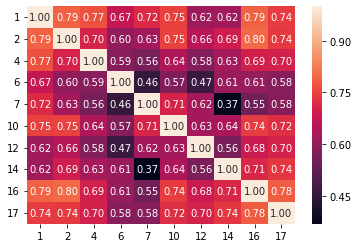

In [30]:
print("NOx")
mplext.plot_matrix(nox_corr.values, mode = "heatmap", show_val = True, labels = [1,2,4,6,7,10,12,14,16,17])

NO


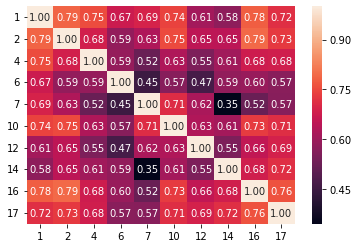

In [31]:
print("NO")
mplext.plot_matrix(no_corr.values, mode = "heatmap", show_val = True, labels = [1,2,4,6,7,10,12,14,16,17])

NO2


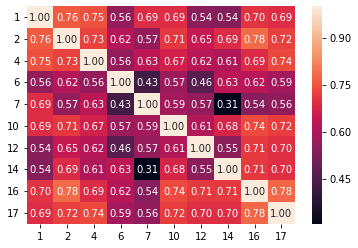

In [32]:
print("NO2")
mplext.plot_matrix(no2_corr.values, mode = "heatmap", show_val = True, labels = [1,2,4,6,7,10,12,14,16,17])

# 5.7

Observing the NO heatmap we see that the sites 6,7,12 and 14 have the lowest correlation with the other sites. These sites have the minimum correlation coefficient with each other (7-14: 0.31, 6-7: 0.43, 6-12: 0.46). The other sites seem that they are enough correlated, with correlation coefficient aroud 0.7 which indicates strong correlation. The same conclusions we get observing the other two heatmaps, since they have only very few differences between them. That was something we were sure that would happen since from ex5.4 we found almost a linear relationship between NO and NOx, and a strong correlation between NO and NO2 (0.8).

In [3]:
data_path = os.path.join(os.getcwd(), 'Data/PartB', "BristolAir_DayAligned.csv")
train_day = pd.read_csv(data_path, compression = "bz2", header = [0], parse_dates = [1])

In [4]:
train_day

,SiteID,Date,0,1,2,3,4,5,6,7,...,62,63,64,65,66,67,68,69,70,71
0,1,2004-07-02,25.250000,18.000000,12.500000,9.250000,8.750000,14.500000,18.500000,30.750000,...,14.250000,13.750000,12.000000,12.500000,10.750000,10.500000,9.250000,9.000000,7.750000,10.750000
1,1,2004-07-03,22.250000,21.000000,23.500000,33.750000,15.500000,9.000000,14.000000,57.750000,...,12.000000,10.250000,11.000000,14.750000,12.500000,11.500000,5.750000,8.250000,6.250000,1.250000
2,1,2004-07-04,28.250000,22.250000,32.000000,34.500000,50.500000,76.500000,165.750000,170.000000,...,19.250000,29.750000,17.500000,26.500000,18.250000,18.750000,12.500000,14.000000,20.750000,26.000000
3,1,2004-07-05,56.750000,62.500000,79.500000,78.500000,115.750000,149.000000,175.000000,119.000000,...,19.250000,23.500000,12.000000,15.500000,12.500000,13.500000,17.750000,38.000000,39.250000,21.500000
4,1,2004-07-06,94.250000,68.250000,44.500000,47.670000,31.750000,28.250000,31.750000,55.750000,...,3.250000,2.250000,3.000000,2.000000,2.000000,1.000000,0.750000,0.750000,1.000000,0.250000
5,1,2004-07-08,28.250000,25.500000,26.250000,27.250000,29.750000,41.500000,48.000000,53.000000,...,26.500000,26.750000,22.500000,26.000000,23.250000,23.750000,20.500000,13.750000,16.000000,36.750000
6,1,2004-07-09,96.750000,78.750000,60.250000,51.750000,50.000000,55.000000,65.000000,65.750000,...,2.750000,3.000000,3.000000,3.500000,3.500000,1.000000,1.750000,3.750000,3.500000,2.500000
7,1,2004-07-10,48.000000,45.250000,45.500000,47.000000,44.750000,41.500000,39.500000,43.500000,...,4.250000,4.500000,4.250000,1.500000,1.750000,1.750000,1.500000,3.250000,1.500000,1.500000
8,1,2004-07-11,38.000000,38.250000,43.500000,48.000000,49.000000,48.500000,51.500000,64.250000,...,14.000000,20.750000,19.750000,13.750000,16.750000,18.750000,15.500000,13.000000,11.500000,11.250000
9,1,2004-07-12,69.500000,66.250000,62.500000,62.500000,65.250000,74.250000,101.000000,137.250000,...,32.250000,30.250000,26.500000,22.500000,22.500000,19.000000,15.000000,13.000000,12.000000,8.500000


In [5]:
pl_data = train_day.iloc[0:5]
pl_data

,SiteID,Date,0,1,2,3,4,5,6,7,...,62,63,64,65,66,67,68,69,70,71
0,1,2004-07-02,25.25,18.00,12.5,9.25,8.75,14.50,18.50,30.75,...,14.25,13.75,12.0,12.50,10.75,10.50,9.25,9.00,7.75,10.75
1,1,2004-07-03,22.25,21.00,23.5,33.75,15.50,9.00,14.00,57.75,...,12.00,10.25,11.0,14.75,12.50,11.50,5.75,8.25,6.25,1.25
2,1,2004-07-04,28.25,22.25,32.0,34.50,50.50,76.50,165.75,170.00,...,19.25,29.75,17.5,26.50,18.25,18.75,12.50,14.00,20.75,26.00
3,1,2004-07-05,56.75,62.50,79.5,78.50,115.75,149.00,175.00,119.00,...,19.25,23.50,12.0,15.50,12.50,13.50,17.75,38.00,39.25,21.50
4,1,2004-07-06,94.25,68.25,44.5,47.67,31.75,28.25,31.75,55.75,...,3.25,2.25,3.0,2.00,2.00,1.00,0.75,0.75,1.00,0.25


In [7]:
pl_data = pl_data.drop(columns = ["SiteID", "Date"])
pl_data

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,25.25,18.00,12.5,9.25,8.75,14.50,18.50,30.75,35.25,39.00,...,14.25,13.75,12.0,12.50,10.75,10.50,9.25,9.00,7.75,10.75
1,22.25,21.00,23.5,33.75,15.50,9.00,14.00,57.75,49.75,49.75,...,12.00,10.25,11.0,14.75,12.50,11.50,5.75,8.25,6.25,1.25
2,28.25,22.25,32.0,34.50,50.50,76.50,165.75,170.00,63.25,57.75,...,19.25,29.75,17.5,26.50,18.25,18.75,12.50,14.00,20.75,26.00
3,56.75,62.50,79.5,78.50,115.75,149.00,175.00,119.00,83.75,94.75,...,19.25,23.50,12.0,15.50,12.50,13.50,17.75,38.00,39.25,21.50
4,94.25,68.25,44.5,47.67,31.75,28.25,31.75,55.75,41.00,37.75,...,3.25,2.25,3.0,2.00,2.00,1.00,0.75,0.75,1.00,0.25


<Figure size 432x288 with 0 Axes>

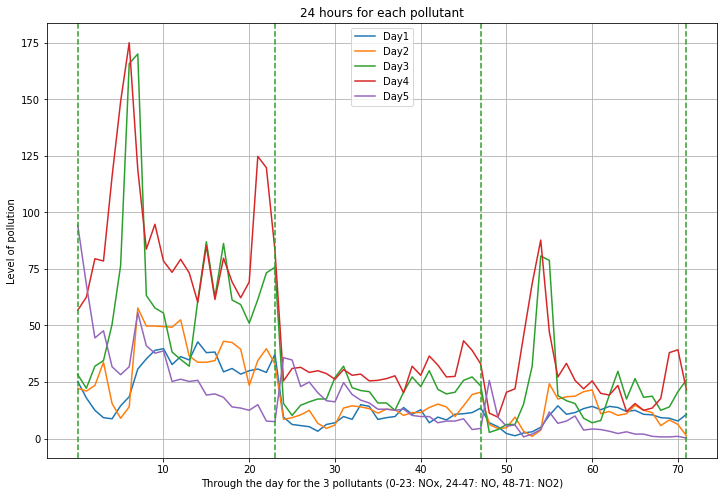

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.figure(figsize=(12,8))
plt.title("24 hours for each pollutant")
plt.ylabel("Level of pollution")
plt.xlabel("Through the day for the 3 pollutants (0-23: NOx, 24-47: NO, 48-71: NO2)")
labels = [10,20,30,40,50,60,70]
plt.xticks(labels)
plt.grid(True)
plt.plot(np.transpose(pl_data))
plt.axvline(x=0, color = "tab:green", linestyle = '--')
plt.axvline(x=23, color = "tab:green", linestyle = '--')
plt.axvline(x=47, color = "tab:green", linestyle = '--')
plt.axvline(x=71, color = "tab:green", linestyle = '--')
plt.legend(["Day1", "Day2", "Day3", "Day4", "Day5"], prop={'size': 10})


plt.show()

In [37]:
plot1 = pl_data.iloc[0]
pp = np.transpose(plot1)
plot2 = pl_data.iloc[1]
pp = np.transpose(plot2)
plot3 = pl_data.iloc[2]
pp = np.transpose(plot3)
plot4 = pl_data.iloc[3]
pp = np.transpose(plot4)
plot5 = pl_data.iloc[4]
pp = np.transpose(plot5)

<Figure size 432x288 with 0 Axes>

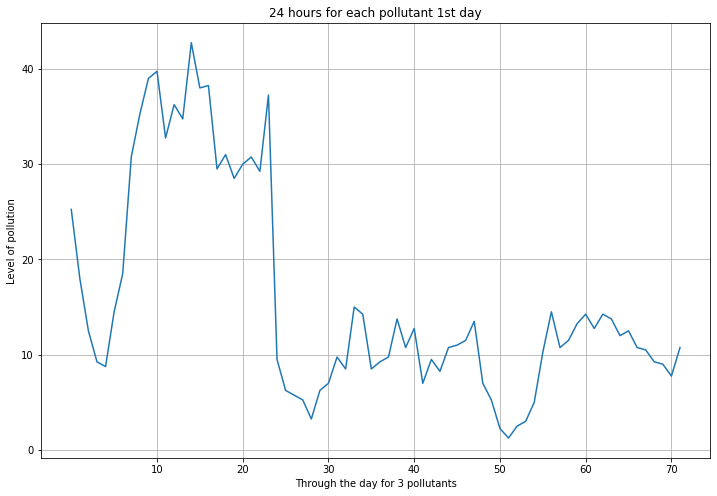

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.figure(figsize=(12,8))
plt.title("24 hours for each pollutant 1st day")
plt.ylabel("Level of pollution")
plt.xlabel("Through the day for 3 pollutants")
labels = [10,20,30,40,50,60,70]
plt.xticks(labels)
plt.grid(True)
plt.plot(plot1)
plt.show()

<Figure size 432x288 with 0 Axes>

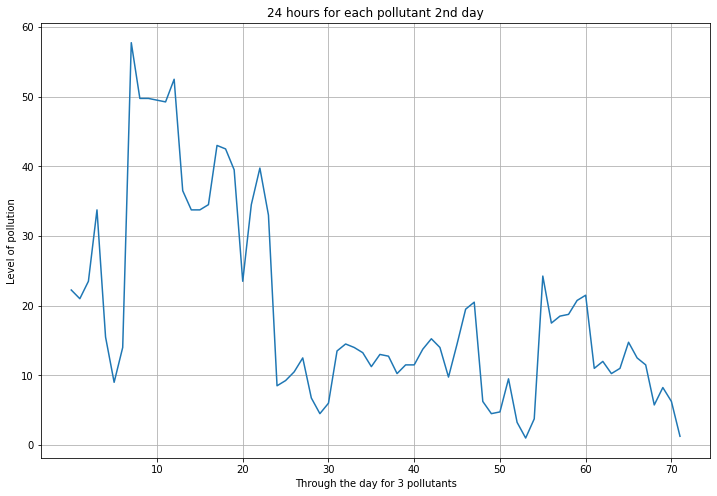

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.figure(figsize=(12,8))
plt.title("24 hours for each pollutant 2nd day")
plt.ylabel("Level of pollution")
plt.xlabel("Through the day for 3 pollutants")
labels = [10,20,30,40,50,60,70]
plt.xticks(labels)
plt.grid(True)
plt.plot(plot2)
plt.show()

<Figure size 432x288 with 0 Axes>

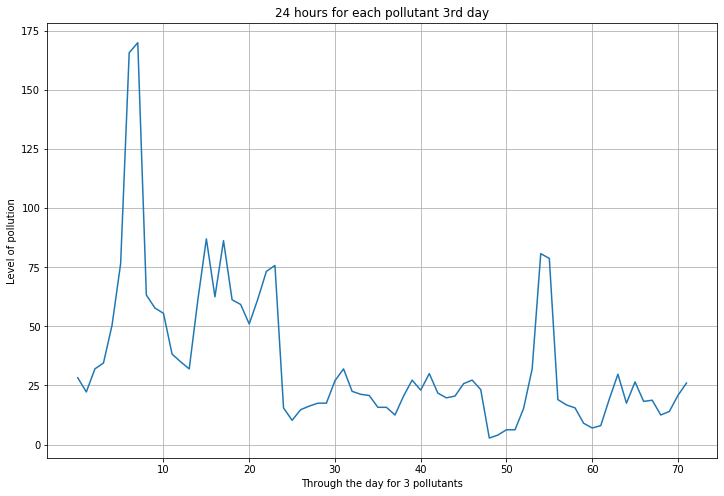

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.figure(figsize=(12,8))
plt.title("24 hours for each pollutant 3rd day")
plt.ylabel("Level of pollution")
plt.xlabel("Through the day for 3 pollutants")
labels = [10,20,30,40,50,60,70]
plt.xticks(labels)
plt.grid(True)
plt.plot(plot3)
plt.show()

<Figure size 432x288 with 0 Axes>

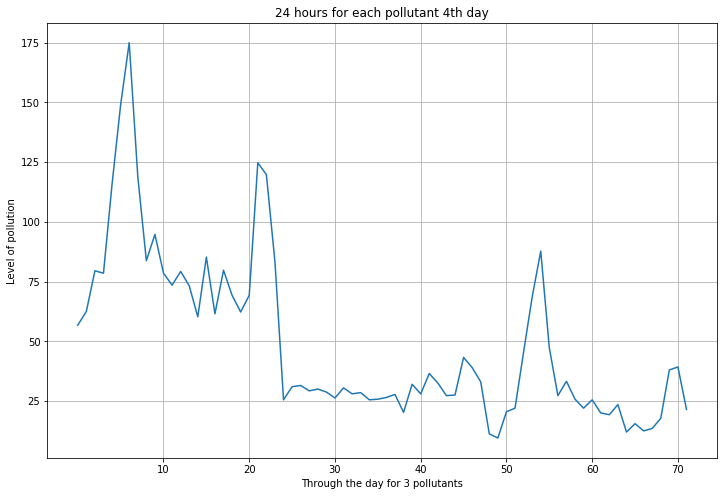

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.figure(figsize=(12,8))
plt.title("24 hours for each pollutant 4th day")
plt.ylabel("Level of pollution")
plt.xlabel("Through the day for 3 pollutants")
labels = [10,20,30,40,50,60,70]
plt.xticks(labels)
plt.grid(True)
plt.plot(plot4)
plt.show()

<Figure size 432x288 with 0 Axes>

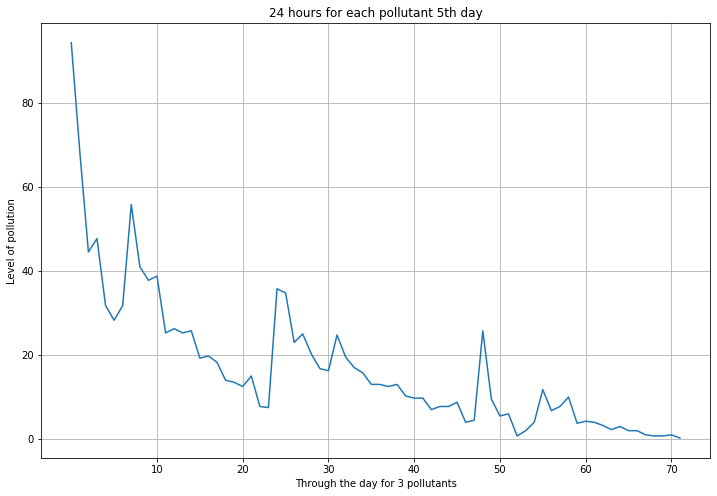

In [42]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.figure(figsize=(12,8))
plt.title("24 hours for each pollutant 5th day")
plt.ylabel("Level of pollution")
plt.xlabel("Through the day for 3 pollutants")
labels = [10,20,30,40,50,60,70]
plt.xticks(labels)
plt.grid(True)
plt.plot(plot5)
plt.show()

In [21]:
train_day.groupby('SiteID').SiteID.count()
aa = train_day.groupby('SiteID')

In [22]:
aa

In [23]:
group1 = aa.get_group(1)
group1 = group1.drop(columns = ["SiteID", "Date"])

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 72, random_state = 0)
group1_arr = group1.values
pca.fit(group1_arr)

PCA(copy=True, iterated_power='auto', n_components=72, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([5.89005963e-01, 1.38215825e-01, 6.68695255e-02, 5.21656756e-02,
       3.90932157e-02, 2.05041254e-02, 1.43090728e-02, 1.22231108e-02,
       9.84813027e-03, 7.53058237e-03, 6.69594834e-03, 5.63632836e-03,
       4.36097634e-03, 4.11060011e-03, 3.39117708e-03, 2.78430397e-03,
       2.48346627e-03, 2.26409996e-03, 2.23821755e-03, 1.97971454e-03,
       1.86316153e-03, 1.79081162e-03, 1.58425385e-03, 1.27645508e-03,
       1.20195894e-03, 1.09046358e-03, 9.93343911e-04, 8.14208695e-04,
       5.93259681e-04, 5.80359769e-04, 4.89359269e-04, 2.86008986e-04,
       2.63653979e-04, 1.84876122e-04, 1.57743610e-04, 1.31828068e-04,
       1.04927559e-04, 9.96449401e-05, 7.96247149e-05, 7.73178721e-05,
       6.93700656e-05, 6.15899681e-05, 5.77649468e-05, 5.58569653e-05,
       5.40517075e-05, 4.74816814e-05, 4.62273622e-05, 4.34391873e-05,
       4.00306727e-05, 3.71303654e-05, 3.22966703e-05, 2.18097878e-05,
       1.29340161e-05, 1.09950964e-05, 5.26675145e-06, 4.77609153e-06,
      

<Figure size 432x288 with 0 Axes>

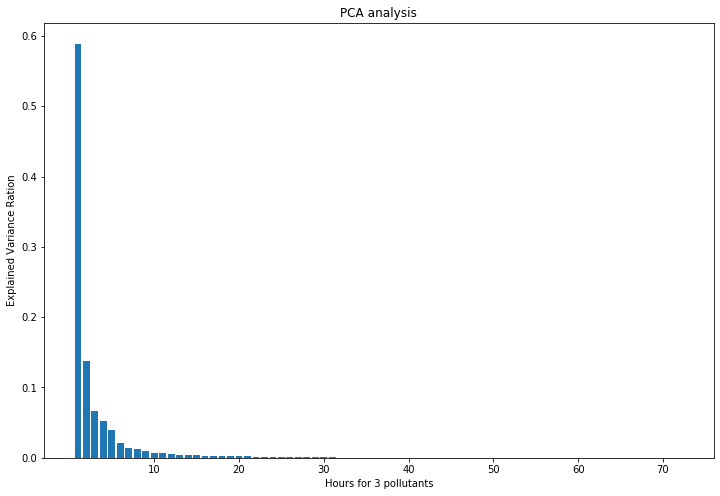

In [26]:
numb = []
for i in range(1,73):
    numb.append(i)
    
    
fig = plt.figure()
plt.figure(figsize=(12,8))
plt.bar(numb, explained_variance)
labels = [10,20,30,40,50,60,70]
plt.xlabel('Hours for 3 pollutants')
plt.ylabel('Explained Variance Ration')
plt.xticks(labels)
plt.title('PCA analysis')
plt.show()

In [27]:
cumulative = []
suma = 0
for i in range(72):
    suma += pca.explained_variance_[i]
    cumulative.append(suma)
    
total_variance = suma
print(total_variance)

counter = 0
ar = 0
sum_current_variance = 0
while counter < 72 and ar < 0.95:
    ar = cumulative[counter] / total_variance
    print(counter , ar)
    counter += 1

print(ar)
print(cumulative[counter-1])
print(counter)

157406.5611300448
0 0.5890059632999927
1 0.7272217878798185
2 0.7940913134198981
3 0.8462569889726923
4 0.8853502046784726
5 0.9058543300611013
6 0.9201634028740505
7 0.9323865136309333
8 0.9422346438960131
9 0.949765226261762
10 0.9564611746048725
0.9564611746048725
150553.26434895632
11


In [28]:
"""fig = plt.figure()
plt.figure(figsize=(12,8))
plt.title("24 hours for each pollutant")
plt.ylabel("Level of pollution")
plt.xlabel("Through the day for 3 pollutants")
#labels = [10,20,30,40,50,60,70]
#plt.xticks(labels)
plt.plot(cumulative)
#plt.gca().legend(('0','1','2','3','4'))
plt.show()"""

'fig = plt.figure()\nplt.figure(figsize=(12,8))\nplt.title("24 hours for each pollutant")\nplt.ylabel("Level of pollution")\nplt.xlabel("Through the day for 3 pollutants")\n#labels = [10,20,30,40,50,60,70]\n#plt.xticks(labels)\nplt.plot(cumulative)\n#plt.gca().legend((\'0\',\'1\',\'2\',\'3\',\'4\'))\nplt.show()'

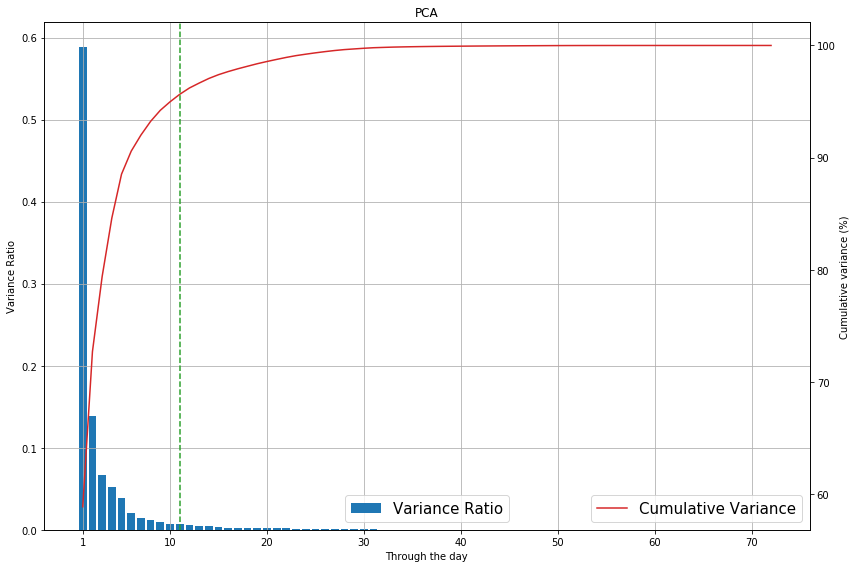

In [30]:
fig, ax1 = plt.subplots(figsize=(12, 8))
plt.title("PCA")
plt.grid(True)
color = 'tab:blue'
ax1.set_xlabel('Through the day')
ax1.set_ylabel('Variance Ratio')
ax1.bar(numb, explained_variance, color=color)
ax1.set_xticks([1,10,20,30,40,50,60,70])
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Cumulative variance (%)')  # we already handled the x-label with ax1
ax2.plot(numb, cumulative/total_variance * 100, color=color)
ax2.tick_params(axis='y')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.axvline(x=11, color = "tab:green", linestyle = '--')
#plt.gca().legend(('Variance Ratio', 'Cumulative Variance', '95% of variance'))
ax1.legend(["Variance Ratio"],loc = 8, prop={'size': 15})
ax2.legend(["Cumulative Variance"],loc = 4, prop={'size': 15})


plt.show()

# 6.3

Initially we had 72 dimensions. After the PCA, we see that we can reduce the dimensionality to 11. That number means that if we choose the 11 eigenvectors with the most variance (highest eigenvalues, indicated with bar plot), we can have the 95% of the total variance of the dataset (indicated with red line - cumulative variance). We see from the graph that after the green line, the variance is too low, and hence the cumulative variance becomes almost steady.

In [96]:
pca_mean = pca.mean_
reshaped_mean = np.reshape(pca_mean, (24,3), order = 'F') 

<Figure size 432x288 with 0 Axes>

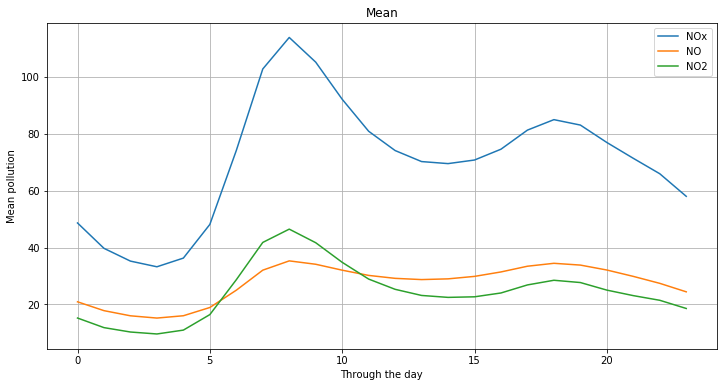

In [97]:
fig = plt.figure()
plt.figure(figsize=(12,6))
plt.title("Mean")
plt.ylabel("Mean pollution")
plt.xlabel("Through the day")
#labels = [10,20,30,40,50,60,70]
#plt.xticks(labels)
plt.grid(True)
plt.plot(reshaped_mean)
plt.gca().legend(('NOx', 'NO', 'NO2'))
plt.show()

In [98]:
first_pca = pca.components_[0]
second_pca = pca.components_[1]
third_pca = pca.components_[2]

In [99]:
third_pca

array([-0.19095395, -0.1859719 , -0.17908057, -0.17798116, -0.19674308,
       -0.2258355 , -0.29321444, -0.20143513,  0.01134169,  0.19579554,
        0.24462472,  0.22706309,  0.17535446,  0.1430516 ,  0.14129781,
        0.16063175,  0.16707533,  0.15966561,  0.07978481, -0.03504152,
       -0.12794125, -0.1782394 , -0.19231029, -0.18422521, -0.04885324,
       -0.04989625, -0.05016014, -0.04900232, -0.05055691, -0.04889772,
       -0.04492082, -0.02144442,  0.01061181,  0.03314076,  0.04064368,
        0.04235357,  0.03690812,  0.03349659,  0.03219901,  0.03592488,
        0.03665958,  0.03289329,  0.01765471, -0.00564854, -0.02704935,
       -0.03887807, -0.04174995, -0.0410561 , -0.08481883, -0.08088971,
       -0.07617461, -0.07647344, -0.08751598, -0.1078    , -0.1549995 ,
       -0.11325935,  0.00055627,  0.10387142,  0.12956126,  0.11676578,
        0.08718682,  0.06834249,  0.06802997,  0.07751754,  0.08149599,
        0.07979451,  0.04007287, -0.01608961, -0.06037477, -0.08

In [100]:
reshaped_first = np.reshape(first_pca, (24,3), order = 'F') 
reshaped_second = np.reshape(second_pca, (24,3), order = 'F') 
reshaped_third = np.reshape(third_pca, (24,3), order = 'F') 

<Figure size 432x288 with 0 Axes>

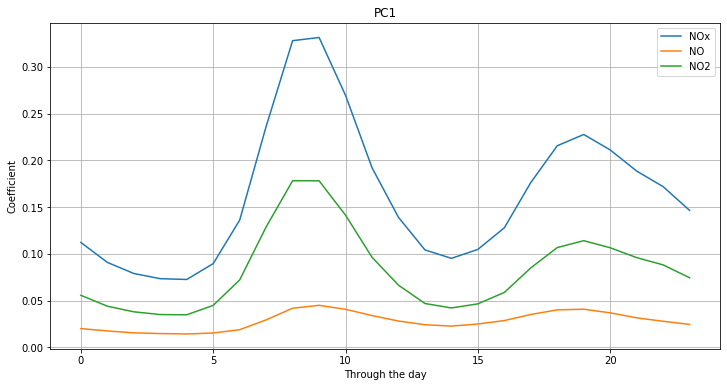

In [101]:
fig = plt.figure()
plt.figure(figsize=(12,6))
plt.title("PC1")
plt.ylabel("Coefficient")
plt.xlabel("Through the day")
#labels = [10,20,30,40,50,60,70]
#plt.xticks(labels)
plt.grid(True)
plt.plot(reshaped_first)
plt.gca().legend(('NOx', 'NO', 'NO2'))
plt.show()

<Figure size 432x288 with 0 Axes>

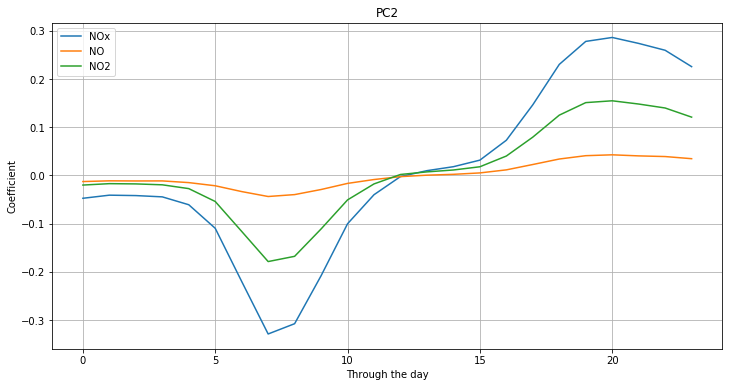

In [102]:
fig = plt.figure()
plt.figure(figsize=(12,6))
plt.title("PC2")
plt.ylabel("Coefficient")
plt.xlabel("Through the day")
#labels = [10,20,30,40,50,60,70]
#plt.xticks(labels)
plt.grid(True)
plt.plot(reshaped_second)
plt.gca().legend(('NOx', 'NO', 'NO2'))
plt.show()

# 6.5

Observing the plots we have for mean and first principal component, we see many similarities. They follow the same pattern for the pollution through the day, since we have in both plots the peaks at around 8am and 18pm. These are the times that most of the cars are in the road, and then the pollution reaches its peak. 
The first principal component corresponds to a line which passes through the multidimensional mean, and minimizes the sum of squares of the distances of the points from the line. So the peaks in the plots do not signify the same thing. 
Looking now at plot of the second principal component, we observe some differences to the first component. At 8am, time that in the 1st PC we had a peak, in 2nd PC we have nadir. That is happening due to the nature of 2nd PC which is that it has to capture the highest variance from what is left from the 1st. Therefore, the linear combination of these 2 will give a better approach to the original data.

In [103]:
data_path = os.path.join(os.getcwd(), 'Data/PartB', "BristolAir_SiteAligned.csv")
train_site = pd.read_csv(data_path, header = [0,1], compression = "bz2")

In [104]:
train_site

Date Time    NOx                                        \
              Unnamed: 0_level_1      1       2       4       6     7      10   
0      2009-03-14 04:00:00+00:00  10.50   15.25   21.50   23.75   8.0   53.25   
1      2009-03-14 05:00:00+00:00   9.75    9.50   11.50   23.25  10.0   30.50   
2      2009-03-15 17:00:00+00:00  67.25   88.75   66.00  163.75  36.0  203.75   
3      2009-03-17 13:00:00+00:00  71.75  124.50  135.00   96.50  38.0  172.50   
4      2009-03-17 15:00:00+00:00  82.00  125.00  104.25  106.50  36.0  193.00   
...                          ...    ...     ...     ...     ...   ...     ...   
14890  2012-03-25 10:00:00+00:00  53.00   67.25  143.50  123.25  29.0   86.75   
14891  2012-03-25 11:00:00+00:00  29.50   42.50   81.00   75.75  36.0   87.25   
14892  2012-03-25 12:00:00+00:00  25.75   44.75   88.25   46.25  27.0  102.00   
14893  2012-03-25 13:00:00+00:00  40.75   46.75   80.50   69.50  17.0   68.00   
14894  2012-03-25 14:00:00+00:00  19.00   37.00   70.25   33.50  15.0   79.75   

                              ...     NO                                   \
          12      14      16  ...      1      2      4      6    7     10   
0       19.0  201.75   40.00  ...   2.75   2.25   4.00   8.75  0.0  12.50   
1       19.0  138.00   42.00  ...   3.00   2.75   3.00   8.50  0.0   5.75   
2      155.0  429.00   94.00  ...  18.25  27.00  16.50  57.25  3.0  69.75   
3      338.0  734.00  196.50  ...  17.75  53.25  46.25  34.75  6.0  61.50   
4      321.0  679.00  329.00  ...  21.50  47.50  34.25  36.50  5.0  63.75   
...      ...     ...     ...  ...    ...    ...    ...    ...  ...    ...   
14890  166.0  219.75  129.25  ...  12.00  25.50  55.25  52.25  4.0  26.25   
14891  168.0  171.75   91.75  ...   5.00  11.50  25.50  30.75  7.0  27.00   
14892  164.0  167.00   90.25  ...   4.25  14.25  29.25  18.25  5.0  33.25   
14893  138.0  167.25  100.75  ...   8.75  14.50  25.25  29.00  2.0  19.75   
14894  111.0  186.25   65.50  ...   3.25   9.75  23.00  12.00  1.0  23.75   

                                     
          12      14      16     17  
0        3.0   64.75   12.50   2.50  
1        3.0   38.50   12.25   2.25  
2       51.0  177.00   21.50  28.50  
3      139.0  345.50   71.00  47.00  
4      130.0  305.25  134.25  45.50  
...      ...     ...     ...    ...  
14890   60.0   98.75   43.00  38.00  
14891   60.0   69.50   25.50  22.00  
14892   61.0   72.25   26.25  33.25  
14893   47.0   71.25   31.50  33.25  
14894   36.0   79.50   16.50  22.25  

[14895 rows x 31 columns]

In [105]:
train_site_NOx = train_site["NOx"]

In [106]:
train_site_NOx_y = train_site_NOx["17"]
train_site_NOx_X = train_site_NOx.drop(columns = ["17"])

In [107]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append('./mpctools-master/mpctools/extensions')

import skext

In [108]:
from sklearn.model_selection import ShuffleSplit

In [109]:
train_indices, val_indices, test_indices = skext.multi_way_split(y = train_site_NOx_y, sizes = [0.6, 0.15, 0.25], splitter = ShuffleSplit, random_state = 0 )

In [110]:
print(train_indices.shape, val_indices.shape, test_indices.shape)

(8937,) (2234,) (3724,)


# 7.1

train_set : 8937, 
validation_set : 2234, 
test_set : 3724

In [111]:
train_X = train_site_NOx_X.iloc[train_indices]
train_y = train_site_NOx_y.iloc[train_indices]
val_X = train_site_NOx_X.iloc[val_indices]
val_y = train_site_NOx_y.iloc[val_indices]
test_X = train_site_NOx_X.iloc[test_indices]
test_y = train_site_NOx_y.iloc[test_indices]

In [112]:
y_mean = train_y.mean()    
y_mean

train_pred = []
val_pred = []

for i in range(train_y.size):
    train_pred.append(y_mean)
    
for i in range(val_y.size):
    val_pred.append(y_mean)
    
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_train_baseline = sqrt(mean_squared_error(train_y, train_pred))
print(rms_train_baseline)

rms_val_baseline = sqrt(mean_squared_error(val_y, val_pred))
print(rms_val_baseline)

79.71384620780579
80.2050030835507


# 7.2

We can use as a baseline a predictor which always says that the predicted value is the mean of the target values of the training set. In this exercise the baseline regressor predicts always 98.32. The RMSE for the train data is 79.7 and for the validation set is 80.2. These numbers represent, on average, the distance between every actual value to the predicted value (98.32). These distances (variance) are very high.

In [113]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(train_X, train_y)

predicted_train_X = reg.predict(train_X)
print(reg.coef_)
rms_train_pred = sqrt(mean_squared_error(train_y, predicted_train_X))

[ 0.11555569  0.00994714  0.13413921 -0.00679908  0.05938753  0.0797791
  0.12910957  0.09450729  0.16182776]


In [114]:
rms_train_pred

39.83472027954455

In [115]:
predicted_val_X = reg.predict(val_X)
rms_val_pred = sqrt(mean_squared_error(val_y, predicted_val_X))

rms_val_pred

41.12740349422

# 7.3

The RMSE on the training set is 39.8 and on the validation set is 41.1. These results indicate a great performance improvement when comparing linear regression with the baseline we used in the previous exercise. The RMSE is around the half compared to the RMSE on the baseline predictor.

In [116]:
err = []
for i in range(val_y.size):
    err.append(val_y.iloc[i] - predicted_val_X[i])

err = np.asarray(err)
print(err.std())
print(err.mean())

41.118586828749784
0.851548814187496


<Figure size 432x288 with 0 Axes>

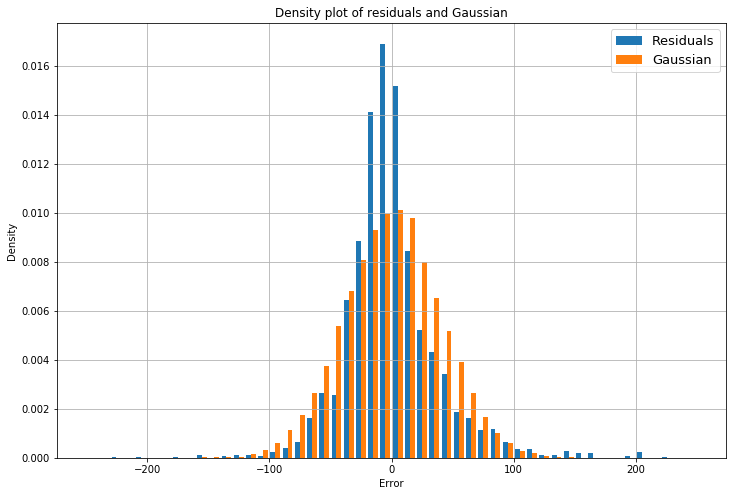

In [121]:
from scipy import stats
import matplotlib.pyplot as plt

gaussian = stats.norm(loc=-9.693338966529194e-15, scale=39.83472027954455)
samples = gaussian.rvs(10*err.size)
ga = gaussian.pdf(samples)
fig = plt.figure()
plt.figure(figsize=(12,8))
plt.hist(x=[err,samples], bins=50, range = (-250,250), density = True)
plt.grid(True)
plt.title("Density plot of residuals and Gaussian")
plt.ylabel("Density")
plt.xlabel("Error")
plt.gca().legend(('Residuals', 'Gaussian'), prop={'size': 13})
plt.show()

# 7.6

We can say that the plot confirms the assumption we made in Q7.4, since we observe almost the same distribution between the residuals and the Gaussian with small differences on the density and the slightly wider distribution of the residuals.

# 7.7

To evaluate the importance of each feature, it isn't enough to just look at the weights of coefficients because in each feature, the scale is different. So, by normalizing the features, we have comparable values. In SKLearn, the normalisation subtracts the mean by each value and then divides it by the L2-norm. After that, the features have the same meaning and we can decide which of them are important. This will not affect the performance, because LR is looking at the proportional relationships of the data and we already have the same meaning between the features.

In [122]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(normalize = True).fit(train_X, train_y)
ppe = pd.DataFrame(reg.coef_)

predicted_train_X_norm = reg.predict(train_X)
ppe = ppe.T

cols_ = ppe.columns
cols_ = ["1","2","4","6","7", "10","12","14","16"]
ppe.columns = cols_
ppe

,1,2,4,6,7,10,12,14,16
0,0.115556,0.009947,0.134139,-0.006799,0.059388,0.079779,0.12911,0.094507,0.161828


# 7.8

The most important site is the site 16 and the least important one is the site 6. Comparing the coefficients with the Pearson's correlation coefficient we see that in terms of the most and least important sites, they agree. However, some sites which are highly correlated with the site 17 by looking at Pearson's coefficient, when looking at the relative importance they have no correlation (eg. site 2). Maybe that happens because linear regression assumes that the features need to be uncorrelated with each other, but we already know that there are correlations between the features as found in Q5.6.

In [123]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_jobs = -1)
neigh.fit(train_X, train_y) 

neigh_train_pred = neigh.predict(train_X)
neigh_train_pred
neigh_val_pred = neigh.predict(val_X)
neigh_val_pred

array([ 83.2 , 218.55, 107.35, ...,  26.25, 118.  ,  41.85])

In [124]:
rms_neigh_train_pred = sqrt(mean_squared_error(train_y, neigh_train_pred))
print(rms_neigh_train_pred)

rms_neigh_val_pred = sqrt(mean_squared_error(val_y, neigh_val_pred))
print(rms_neigh_val_pred)

32.43647936515854
40.3071558368958


# 7.9

In Linear Regression we had almost the same RMSE for the training and validation sets, but using KNN we see some differences. We have a signifficantly smaller RMSE on training set (32.4), but in terms of RMSE on the validation set (40.3), we do not see significant improvement, compared to Linear Regression. KNN is very sensitiy to irrelevant attributes, and since in our dataset, we have seen that the correlation with some sites is low, this will affect the regressor.

In [125]:
train_rmse = []
val_rmse = []

k = 2
while k <=32:
    neigh = KNeighborsRegressor(n_neighbors = k, n_jobs = -1)
    neigh.fit(train_X, train_y)
    neigh_train_pred = neigh.predict(train_X)
    
    rmse_neigh_train_pred = sqrt(mean_squared_error(train_y, neigh_train_pred))
    train_rmse.append(rmse_neigh_train_pred)
    
    
    neigh_val_pred = neigh.predict(val_X)
    rmse_neigh_val_pred = sqrt(mean_squared_error(val_y, neigh_val_pred))

    val_rmse.append(rmse_neigh_val_pred)
    k *= 2
    
print(train_rmse)
print(val_rmse)

[25.149918774899085, 31.42280882774953, 34.11215836361028, 35.47142878389425, 36.715347607557376]
[42.95551269008171, 40.595609577419665, 39.37125304834977, 38.901851355962386, 39.13083888473987]


<Figure size 432x288 with 0 Axes>

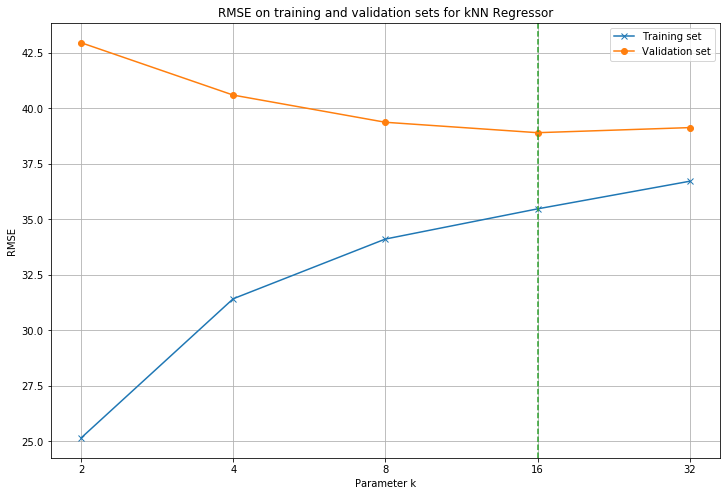

In [126]:
fig = plt.figure()
plt.figure(figsize=(12,8))
plt.title("RMSE on training and validation sets for kNN Regressor")
plt.ylabel("RMSE")
plt.xlabel("Parameter k")
labels = ["2","4","8","16","32"]
plt.xticks(range(5), labels) 
plt.plot(train_rmse, marker = 'x')
plt.plot(val_rmse, marker = 'o')
plt.grid(True)
plt.gca().legend(("Training set", "Validation set"))
plt.axvline(x=3, color = "tab:green", linestyle = '--')

plt.show()

# 7.11

The best case RMSE performance on the validation set for KNN is 38.9, when k = 16 as we seen from the plot of the previous question.

In [128]:
from sklearn.tree import DecisionTreeRegressor

In [129]:
dt_train_rmse = []
dt_val_rmse = []

k = 2
while k <=32:
    dt_regressor = DecisionTreeRegressor(max_depth = k, random_state=0)
    dt_regressor.fit(train_X, train_y)
    dt_train_pred = dt_regressor.predict(train_X)
    
    dt_rmse_train_pred = sqrt(mean_squared_error(train_y, dt_train_pred))
    dt_train_rmse.append(dt_rmse_train_pred)
    
    
    dt_val_pred = dt_regressor.predict(val_X)
    dt_rmse_val_pred = sqrt(mean_squared_error(val_y, dt_val_pred))

    dt_val_rmse.append(dt_rmse_val_pred)
    k *= 2
    
print(dt_train_rmse)
print(dt_val_rmse)

[52.6134623455056, 43.38835611468483, 33.27961915442297, 13.672221342095378, 0.09114909269816067]
[53.25095179219833, 46.12769116861275, 45.84380928287788, 53.4486396323909, 55.62441997967441]


<Figure size 432x288 with 0 Axes>

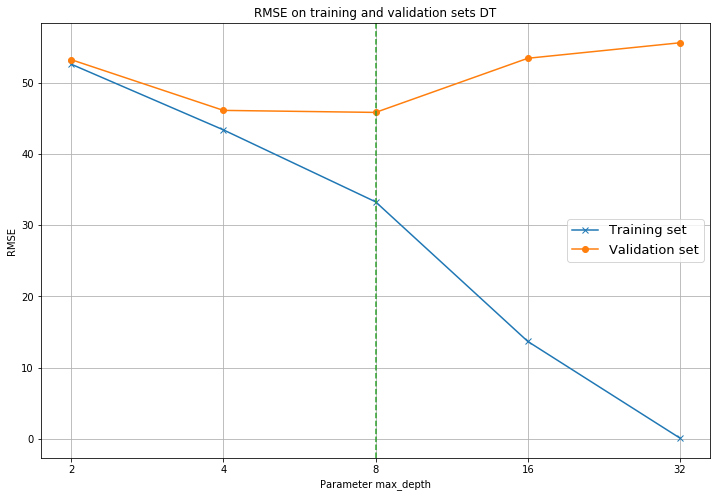

In [131]:
fig = plt.figure()
plt.figure(figsize=(12,8))
plt.title("RMSE on training and validation sets DT")
plt.ylabel("RMSE")
plt.xlabel("Parameter max_depth")
labels = ["2","4","8","16","32"]
plt.xticks(range(5), labels) 
plt.grid(True)
plt.plot(dt_train_rmse, marker = 'x')
plt.plot(dt_val_rmse, marker = 'o')
plt.gca().legend(("Training set", "Validation set"),prop={'size': 13}, loc = 5)
plt.axvline(x=2, color = "tab:green", linestyle = '--')

plt.show()

# 7.13

The best RMSE performance on the validation set is 45.84 when max_depth is 8. From the plot we see that the Decision Tree Regressor fits more and more the training data as the max_depth parameter increases. However, the RMSE on the validation set reaches its minimum and then while we increase the max_depth parameter its performance is worse.

# 7.14

In [36]:
train_X = train_site_NOx_X.iloc[train_indices]
train_y = train_site_NOx_y.iloc[train_indices]
val_X = train_site_NOx_X.iloc[val_indices]
val_y = train_site_NOx_y.iloc[val_indices]
test_X = train_site_NOx_X.iloc[test_indices]
test_y = train_site_NOx_y.iloc[test_indices]

train_X = train_X.append(val_X)
train_y = train_y.append(val_y)

performances = []

In [37]:
baseline_test_pred = []

y_baseline = train_y.mean()

for i in range(test_y.size):
    baseline_test_pred.append(y_baseline)
    
baseline_rmse = sqrt(mean_squared_error(test_y, baseline_test_pred))
performances.append(round(baseline_rmse,2))

In [38]:
reg = LinearRegression(normalize = True).fit(train_X, train_y)
linear_test_X_norm = reg.predict(test_X)

rmse_linear_test_pred = sqrt(mean_squared_error(test_y, linear_test_X_norm))
performances.append(round(rmse_linear_test_pred,2))

In [39]:
neigh = KNeighborsRegressor(n_neighbors = 16, n_jobs = -1)
neigh.fit(train_X, train_y)
neigh_test_pred = neigh.predict(test_X)
rmse_neigh_test_pred = sqrt(mean_squared_error(test_y, neigh_test_pred))
performances.append(round(rmse_neigh_test_pred,2))

In [40]:
dt_regressor = DecisionTreeRegressor(max_depth = 8, random_state=0)
dt_regressor.fit(train_X, train_y)
dt_test_pred = dt_regressor.predict(test_X)
dt_rmse_test_pred = sqrt(mean_squared_error(test_y, dt_test_pred))
performances.append(round(dt_rmse_test_pred,2))

In [41]:
performances

[78.95, 40.51, 37.98, 43.07]

In [42]:
performance_labels = ["Baseline", "Linear Regression", "KNN Regressor", "DT Regressor"]

In [43]:
perform_df = pd.DataFrame(performances, columns = ["RMSE"])

perform_df = perform_df.T

cols_ = perform_df.columns
cols_ = performance_labels
perform_df.columns = cols_
perform_df

,Baseline,Linear Regression,KNN Regressor,DT Regressor
RMSE,78.95,40.51,37.98,43.07
